First, let's import the required libraries and packages

In [1]:
from google.colab import drive
from pathlib import Path
import glob
import os

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import json to view the json data provided
import json

#basic data analysis libraries
import pandas as pd
import numpy as np
from collections import Counter

#visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

#Text Libraries

#NLTK
#!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

#String
import string
from textblob import TextBlob
import re
import spacy

#sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

#Gensim
import gensim
from gensim import corpora
!pip install pyLDAvis==2.1.2
import pyLDAvis
import pyLDAvis.gensim


/usr/local/lib/python3.7/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading : Package '' not found in index
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_dat

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


Opening the JSON file using the json library

In [2]:
web='vinted'
# Opening the JSON file
json_dir = './data/vinted'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    dfs.append(json_data)
df = pd.concat(dfs)
print(len(df))

274


Opening the JSON data using Pandas

In [3]:
#Using Pandas

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    dfs.append(json_data)
reviewsDF = pd.concat(dfs)
reviewsDF.head(10)

,date,author,text,title,stars,location,url,site
0,2021-05-17,Lucy Curtin,Absolutely terrible customer service - so many...,Absolutely terrible customer service,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
1,2021-05-21,Carolyn Worlock,Vinted works really well until there is a prob...,Vinted works really well until there is a problem,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
2,2021-05-23,Rosemary Hooper,There should be a no STAR option for this appa...,There should be a no STAR option for…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
3,2021-05-23,Sarah A,Would be ok if some of the buyers didn't mess ...,Would be ok if some of the buyers…,2,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
4,2021-05-30,Michelle (customer),Disgraceful service....not only am I now out o...,Disgraceful service....not only am I…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
5,2021-05-31,Suzanne Fowler,Vinted is great whilst things go well but the ...,No seller protection,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
6,2021-06-02,Chrissy Bertram,I have been a loyal Vinted buyer since last ye...,Vinted/Buyer Protection Fee,1,US,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
7,2021-06-03,Julie Malpus,I sold an item on vinted when the buyer receiv...,Avoid vinted at all costs,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
8,2021-06-04,Colin Edwards,Most of the buyers and sellers are good and tr...,Robots should be better than this by now,1,FR,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
9,2021-06-08,Mary,Please don’t use vinted I accepted a return bu...,Please don’t use vinted I accepted a…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json


# **Data Cleaning**

Round 1 of cleaning: 

- Converting the text to Lowercase

- Removing text in brackets

- Removing punctuation and words

In [4]:
#Round 1 of cleaning
def clean_text(text):
    # converting to lower
    text = text.lower() 
    #remove text in square brackets
    text = re.sub('\[.*?\]','',text)
    #remove punctuation and remove words
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

<>:6: DeprecationWarning: invalid escape sequence \[
<>:9: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \[
<>:9: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \[
<>:9: DeprecationWarning: invalid escape sequence \w
/var/folders/ds/68h8wl896q32r63fbnlht_3c0000gn/T/ipykernel_3294/3334382259.py:6: DeprecationWarning: invalid escape sequence \[
  text = re.sub('\[.*?\]','',text)
/var/folders/ds/68h8wl896q32r63fbnlht_3c0000gn/T/ipykernel_3294/3334382259.py:9: DeprecationWarning: invalid escape sequence \w
  text = re.sub('\w*\d\w*','',text)


In [5]:
reviewsDF.title = reviewsDF.title.apply(clean_text)
reviewsDF.text = reviewsDF.text.apply(clean_text)
reviewsDF.head()

,date,author,text,title,stars,location,url,site
0,2021-05-17,Lucy Curtin,absolutely terrible customer service so many ...,absolutely terrible customer service,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
1,2021-05-21,Carolyn Worlock,vinted works really well until there is a prob...,vinted works really well until there is a problem,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
2,2021-05-23,Rosemary Hooper,there should be a no star option for this appa...,there should be a no star option for…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
3,2021-05-23,Sarah A,would be ok if some of the buyers didnt mess y...,would be ok if some of the buyers…,2,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
4,2021-05-30,Michelle (customer),disgraceful servicenot only am i now out of po...,disgraceful servicenot only am i…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json


Round 2 of Cleaning:

- Removing additional punctuation

- Removing non-sensical text

In [6]:
#Round 2 of cleaning
def clean_text2(text):
    '''get rid of some additional punctuation and non-sesical text that was missed the first time'''
    text = re.sub('[''""...]','',text)
    text = re.sub('\n','',text)
    return text

In [7]:
reviewsDF.title = reviewsDF.title.apply(clean_text2)
reviewsDF.text = reviewsDF.text.apply(clean_text2)
reviewsDF.head()

,date,author,text,title,stars,location,url,site
0,2021-05-17,Lucy Curtin,absolutely terrible customer service so many ...,absolutely terrible customer service,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
1,2021-05-21,Carolyn Worlock,vinted works really well until there is a prob...,vinted works really well until there is a problem,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
2,2021-05-23,Rosemary Hooper,there should be a no star option for this appa...,there should be a no star option for…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
3,2021-05-23,Sarah A,would be ok if some of the buyers didnt mess y...,would be ok if some of the buyers…,2,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
4,2021-05-30,Michelle (customer),disgraceful servicenot only am i now out of po...,disgraceful servicenot only am i…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json


Round 3 of Cleaning:

- Punctuation

- Words containing numbers

- Stopwords

- Empty tokens

- Part of Speech Tagging

- Lemmatization

- Removing one letter words

In [8]:
#Round 3 of cleaning (postag, stopwords removal and lemmatization etc)
def get_wordnet_pos(word):
    #Map POS tag to first letter
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
    
def clean_text3(text):
    #tokenizing removing puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    #removing words containing numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    #removing stopwords
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    #removing empty tokens
    text = [t for t in text if len(t) > 0]
    #part of speech tagging
    pos_tags = pos_tag(text)
    #lemmatizing text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    #removing one letter words
    text = [t for t in text if len(t) > 1]
    #joining
    text = " ".join(text)
    return(text)

In [9]:
reviewsDF.title = reviewsDF.title.apply(clean_text3)
reviewsDF.text = reviewsDF.text.apply(clean_text3)
reviewsDF.head()

,date,author,text,title,stars,location,url,site
0,2021-05-17,Lucy Curtin,absolutely terrible customer service many emai...,absolutely terrible customer service,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
1,2021-05-21,Carolyn Worlock,vinted work really well problem sold number it...,vinted work really well problem,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
2,2021-05-23,Rosemary Hooper,star option appalling socalled company complai...,star option for…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
3,2021-05-23,Sarah A,would ok buyer didnt mess go trouble sending i...,would ok buyers…,2,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json
4,2021-05-30,Michelle (customer),disgraceful servicenot pocket postage paid adi...,disgraceful servicenot i…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json


Save the Cleaned data for easy later use

In [10]:
#Pickling the DF for later use
reviewsDF.to_pickle(web+".pkl")

# **Feature Engineering**

Adding new columns for
1. Length
2. Word Count
3. Polarity
4. Sentiment
5. Rating
6. Website

In [11]:
#Let's add a column length, which indicates the length of each text
reviewsDF['length'] = reviewsDF['text'].apply(len)
#Adding a column numOfWords which indicates the number of words in the text
reviewsDF['numOfWords'] = reviewsDF['text'].apply(lambda x: len(x.split(" ")))
#Adding a Polarity column - using TextBlob
reviewsDF['polarity'] = reviewsDF['text'].map(lambda text: TextBlob(text).sentiment.polarity)
#Adding Sentiment Intensity column - using SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
reviewsDF["sentiments"] = reviewsDF["text"].apply(lambda x: sid.polarity_scores(x))
reviewsDF = pd.concat([reviewsDF.drop(['sentiments'], axis=1), reviewsDF['sentiments'].apply(pd.Series)], axis=1)
reviewsDF.head()

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound
0,2021-05-17,Lucy Curtin,absolutely terrible customer service many emai...,absolutely terrible customer service,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,68,9,-0.250000,0.545,0.455,0.000,-0.7346
1,2021-05-21,Carolyn Worlock,vinted work really well problem sold number it...,vinted work really well problem,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,393,62,0.333333,0.162,0.547,0.291,0.8417
2,2021-05-23,Rosemary Hooper,star option appalling socalled company complai...,star option for…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,124,16,-0.116667,0.255,0.612,0.133,-0.5267
3,2021-05-23,Sarah A,would ok buyer didnt mess go trouble sending i...,would ok buyers…,2,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,246,37,0.041667,0.000,0.793,0.207,0.7652
4,2021-05-30,Michelle (customer),disgraceful servicenot pocket postage paid adi...,disgraceful servicenot i…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,199,27,-0.228571,0.287,0.659,0.054,-0.8442


In [12]:
#Adding a Sentiment column depending on the calculated compound score
reviewsDF['Sentiment'] = reviewsDF['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
reviewsDF.Sentiment.value_counts()

neg    161
pos    113
Name: Sentiment, dtype: int64

In [13]:
#Adding a column (numeric) for rating
#reviewsDF.stars.value_counts()
reviewsDF['rating'] = reviewsDF['stars']
reviewsDF.head()

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating
0,2021-05-17,Lucy Curtin,absolutely terrible customer service many emai...,absolutely terrible customer service,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,68,9,-0.250000,0.545,0.455,0.000,-0.7346,neg,1
1,2021-05-21,Carolyn Worlock,vinted work really well problem sold number it...,vinted work really well problem,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,393,62,0.333333,0.162,0.547,0.291,0.8417,pos,1
2,2021-05-23,Rosemary Hooper,star option appalling socalled company complai...,star option for…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,124,16,-0.116667,0.255,0.612,0.133,-0.5267,neg,1
3,2021-05-23,Sarah A,would ok buyer didnt mess go trouble sending i...,would ok buyers…,2,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,246,37,0.041667,0.000,0.793,0.207,0.7652,pos,2
4,2021-05-30,Michelle (customer),disgraceful servicenot pocket postage paid adi...,disgraceful servicenot i…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,199,27,-0.228571,0.287,0.659,0.054,-0.8442,neg,1


In [14]:
#Analyzing URL column
reviewsDF.url.str.split("review/")[0]
reviewsDF['Site'] = reviewsDF.url.apply(lambda x: x.split("review/")[1])
reviewsDF.head()

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating,Site
0,2021-05-17,Lucy Curtin,absolutely terrible customer service many emai...,absolutely terrible customer service,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,68,9,-0.250000,0.545,0.455,0.000,-0.7346,neg,1,vinted.fr?page=7&stars=1&stars=2&stars=3
1,2021-05-21,Carolyn Worlock,vinted work really well problem sold number it...,vinted work really well problem,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,393,62,0.333333,0.162,0.547,0.291,0.8417,pos,1,vinted.fr?page=7&stars=1&stars=2&stars=3
2,2021-05-23,Rosemary Hooper,star option appalling socalled company complai...,star option for…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,124,16,-0.116667,0.255,0.612,0.133,-0.5267,neg,1,vinted.fr?page=7&stars=1&stars=2&stars=3
3,2021-05-23,Sarah A,would ok buyer didnt mess go trouble sending i...,would ok buyers…,2,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,246,37,0.041667,0.000,0.793,0.207,0.7652,pos,2,vinted.fr?page=7&stars=1&stars=2&stars=3
4,2021-05-30,Michelle (customer),disgraceful servicenot pocket postage paid adi...,disgraceful servicenot i…,1,GB,https://www.trustpilot.com/review/vinted.fr?pa...,reviews_7.json,199,27,-0.228571,0.287,0.659,0.054,-0.8442,neg,1,vinted.fr?page=7&stars=1&stars=2&stars=3


In [15]:
reviewsDF.Site.value_counts()

vinted.fr?page=7&stars=1&stars=2&stars=3     20
vinted.fr?page=6&stars=1&stars=2&stars=3     20
vinted.fr?page=13&stars=1&stars=2&stars=3    20
vinted.fr?page=1&stars=1&stars=2&stars=3     20
vinted.fr?page=12&stars=1&stars=2&stars=3    20
vinted.fr?page=3&stars=1&stars=2&stars=3     20
vinted.fr?page=11&stars=1&stars=2&stars=3    20
vinted.fr?page=10&stars=1&stars=2&stars=3    20
vinted.fr?page=2&stars=1&stars=2&stars=3     20
vinted.fr?page=5&stars=1&stars=2&stars=3     20
vinted.fr?page=9&stars=1&stars=2&stars=3     20
vinted.fr?page=8&stars=1&stars=2&stars=3     20
vinted.fr?page=4&stars=1&stars=2&stars=3     20
vinted.fr?page=14&stars=1&stars=2&stars=3    14
Name: Site, dtype: int64

# **EDA**

Exploratory Data Analysis

In [16]:
#This function is used to see mathematical metrics of all the columns 
reviewsDF.describe()

,stars,length,numOfWords,polarity,neg,neu,pos,compound,rating
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,1.083942,309.127737,45.642336,-0.078275,0.193000,0.673307,0.133679,-0.188728,1.083942
std,0.358412,290.242140,43.081359,0.295143,0.142462,0.151835,0.105191,0.630364,0.358412
min,1.000000,14.000000,3.000000,-1.000000,0.000000,0.190000,0.000000,-0.989000,1.000000
25%,1.000000,124.500000,19.000000,-0.200000,0.099250,0.578750,0.069000,-0.781300,1.000000
50%,1.000000,229.000000,34.000000,-0.023046,0.171500,0.669000,0.124000,-0.320700,1.000000
75%,1.000000,387.000000,58.000000,0.093710,0.268000,0.765750,0.191500,0.418475,1.000000
max,3.000000,2315.000000,357.000000,0.700000,0.697000,1.000000,0.695000,0.982400,3.000000


In [17]:
#To see the type of each column and check if there are any null values 
reviewsDF.date = pd.to_datetime(reviewsDF['date'])
reviewsDF = reviewsDF[reviewsDF.stars < 4]
reviewsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 19
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        274 non-null    datetime64[ns]
 1   author      274 non-null    object        
 2   text        274 non-null    object        
 3   title       274 non-null    object        
 4   stars       274 non-null    int64         
 5   location    274 non-null    object        
 6   url         274 non-null    object        
 7   site        274 non-null    object        
 8   length      274 non-null    int64         
 9   numOfWords  274 non-null    int64         
 10  polarity    274 non-null    float64       
 11  neg         274 non-null    float64       
 12  neu         274 non-null    float64       
 13  pos         274 non-null    float64       
 14  compound    274 non-null    float64       
 15  Sentiment   274 non-null    object        
 16  rating      274 non-null   

In [18]:
#To count number of samples for each rating
reviewsDF.rating.value_counts()

1    258
2      9
3      7
Name: rating, dtype: int64

<AxesSubplot:>

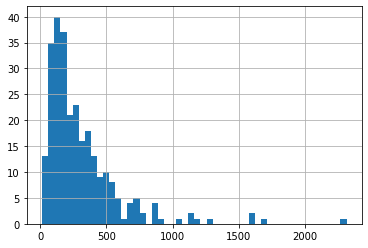

In [19]:
# Review length distribution
reviewsDF['length'].hist(bins=50)

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>, <AxesSubplot:>]], dtype=object)

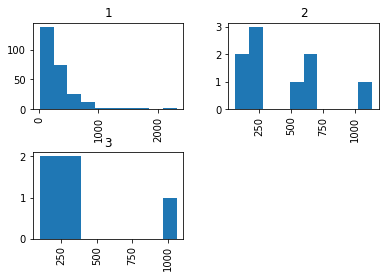

In [20]:
#Histogram plot to see the lenght of each rating
reviewsDF.hist(column = 'length', by = 'rating')

In [21]:
#Histogram plot to analyze number of reviews with respect to date
#As we can see, 2018 has many reviews comapared to other years
fig = px.histogram(reviewsDF, x='date', title='Reviews by date')
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Number of reviews')
fig.show()

/usr/local/lib/python3.7/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/usr/local/lib/python3.7/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [22]:
#Histogram plot to analyze number of reviews with respect to date and ratings
#As we can see there are many one star ratings compared to all other ratings 
fig = px.histogram(reviewsDF, x='date',  title='Reviews by date', color='rating', nbins=10, log_y=True, barmode='group')
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Number of reviews')
fig.show()

/usr/local/lib/python3.7/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/usr/local/lib/python3.7/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<AxesSubplot:>

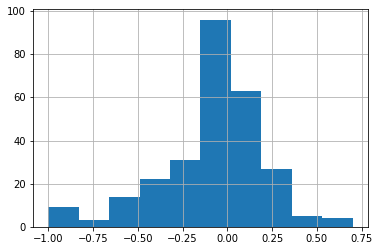

In [23]:
#Histogram plot for polarity, and by observing we say that there are many reviwes with the polarity between 0 to 0.25
reviewsDF.polarity.hist()

<AxesSubplot:>

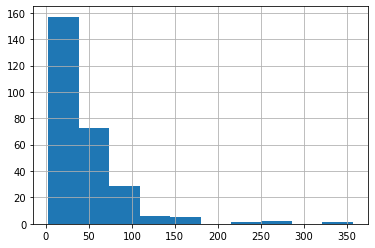

In [24]:
#Plot to analyze number of words
reviewsDF['numOfWords'].hist()

In [25]:
#top positive reviews
reviewsDF.sort_values("pos", ascending = False)[["text", "pos", "neg", "stars"]].head(20)

,text,pos,neg,stars
8,buyer seller good trustworthy vinted treat lik...,0.695,0.114,1
6,customer service number customer care help pag...,0.468,0.126,1
18,super principe mais service client nullissime,0.438,0.000,1
1,much faffing around getting payment received e...,0.412,0.000,2
15,haven’t used vinted yet definitely won’t revie...,0.412,0.000,1
18,vinted surprising many kind article even prohi...,0.373,0.000,3
18,bunch bully constantly flagged account commerc...,0.367,0.063,1
5,low client service support also liar publicity...,0.362,0.210,1
1,absolute disgrace website awful seller support...,0.360,0.245,1
2,account blocked justification asked closed dis...,0.339,0.106,1


In [26]:
#Analyzing the negative data - ascending order 
reviewsDF.sort_values("neg", ascending = False)[["text", "pos", "neg", "stars"]].head(20)

,text,pos,neg,stars
14,poor fraud account vinted respond,0.000,0.697,1
8,worst app ever,0.000,0.672,1
13,awful website scam rob money take item don’t g...,0.000,0.624,1
3,outrageous site encourages dishonest buyer ris...,0.141,0.608,1
6,terrible customer service,0.000,0.608,1
5,worst site met item fake service client horrib...,0.000,0.583,1
9,total fraud everything go fine ok problem prod...,0.139,0.546,1
0,absolutely terrible customer service many emai...,0.000,0.545,1
6,avoid avoid avoid dreadful company deal proble...,0.112,0.514,1
10,zero rate would used poor poor poordont use,0.000,0.508,1


In [27]:
# reviewsDF['length'][1234]

/usr/local/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

/usr/local/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

/usr/local/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

/usr/local/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

/usr/local/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

/usr/local/lib/python3.7/site-packa

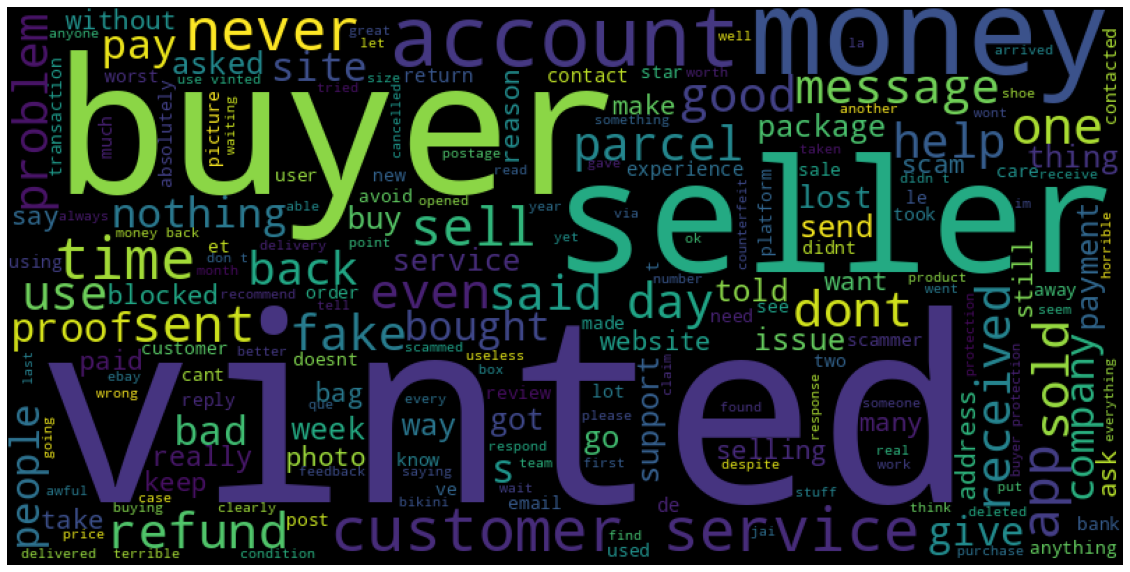

In [28]:
#WordCloud of text in the complete data set
from wordcloud import STOPWORDS

stopwords = ['item', 'vc', 'vestiaire', 'm', 'ive'] + list(STOPWORDS)

text = " ".join(i for i in reviewsDF.text)
wordcloud = WordCloud(stopwords = stopwords, width=800, height=400).generate(text)
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [29]:
#Percentage of each word in the wordcloud
wordcloud.words_

{'vinted': 1.0,
 'buyer': 0.463855421686747,
 'seller': 0.44879518072289154,
 'money': 0.29518072289156627,
 'account': 0.25,
 'customer service': 0.24397590361445784,
 'never': 0.22590361445783133,
 'time': 0.22590361445783133,
 'sell': 0.18373493975903615,
 'app': 0.18072289156626506,
 'sent': 0.1716867469879518,
 'one': 0.1716867469879518,
 'even': 0.16566265060240964,
 'dont': 0.16265060240963855,
 'sold': 0.15963855421686746,
 'refund': 0.1566265060240964,
 'day': 0.14759036144578314,
 'fake': 0.14759036144578314,
 'good': 0.14457831325301204,
 'message': 0.14156626506024098,
 'received': 0.1355421686746988,
 'use': 0.1355421686746988,
 'parcel': 0.13253012048192772,
 'said': 0.13253012048192772,
 'help': 0.12951807228915663,
 'problem': 0.12650602409638553,
 'back': 0.11746987951807229,
 'nothing': 0.11746987951807229,
 'pay': 0.11746987951807229,
 'company': 0.11144578313253012,
 'bought': 0.11144578313253012,
 'site': 0.11144578313253012,
 'people': 0.11144578313253012,
 'bad':

# **Topic Modelling**

In [30]:
reviewData = reviewsDF['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)

In [31]:
#Let's consider the top 20 topics
n_topics = 20
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [32]:
def getCategoriesCounts(lsa_topic_matrix):
  keys = lsa_topic_matrix.argmax(axis=1).tolist()
  count_pairs = Counter(keys).items()
  categories = [pair[0] for pair in count_pairs]
  counts = [pair[1] for pair in count_pairs]
  return (keys,categories, counts)

In [33]:
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)

In [34]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    top_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        if hasattr(temp_vector_sum, 'toarray'):
            temp_vector_sum = temp_vector_sum.toarray()
            top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
            top_indices.append(top_n_word_indices)   
        else:
            top_indices.append([])
    top_words = []
    for topic in top_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [35]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  item vinted buyer
Topic 2:  customer service worst
Topic 3:  app use bad
Topic 4:  account bank payment
Topic 5:  parcel got help
Topic 6:  time fake crook
Topic 7:  easier payment awful
Topic 8:  client support money
Topic 9:  awful scammer website
Topic 10:  poor fraud pay
Topic 11:  et le que
Topic 12:  address number contact
Topic 13:  company incredible paypal
Topic 14:  generated computer removed
Topic 15:  stay away vinted
Topic 16:  website gave going
Topic 17:  review site platform
Topic 18:  fake bag ebay
Topic 19:  rip crooked replying
Topic 20:  okif problem girl


We can see the top 20 topics in the whole dataset

Now let's compare the topics year by year

In [36]:
reviewsDF.date.describe()

count                     274
unique                    236
top       2022-02-07 00:00:00
freq                        3
first     2017-02-19 00:00:00
last      2022-05-04 00:00:00
Name: date, dtype: object

In [37]:
reviewsDF.date.dt.year.value_counts() #to know the years of the available data

2021    137
2022     61
2020     36
2019     30
2018      7
2017      3
Name: date, dtype: int64

In [38]:
#subset the full dataset into yearly dataframes
reviewsDF2020 = reviewsDF[reviewsDF.date.dt.year==2020]
reviewsDF2021 = reviewsDF[reviewsDF.date.dt.year==2021]
reviewsDF2022 = reviewsDF[reviewsDF.date.dt.year==2022]

Let's perform LSA to understand the topics for each year

In [39]:
#2020
reviewData = reviewsDF2020['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 2 topics
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2020 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  vinted customer service
Topic 2:  terrible customer service
Topic 3:  money sell scoundrel
Topic 4:  client pay service
Topic 5:  parcel undelivered irresponsible
Topic 6:  simply buyer ll
Topic 7:  que jai et
Topic 8:  useless picture mondial
Topic 9:  app cheap company
Topic 10:  site nice receive


In [40]:
#2021
reviewData = reviewsDF2021['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 14 topics
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2021 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  vinted item buyer
Topic 2:  app worst experience
Topic 3:  payment bank account
Topic 4:  customer service care
Topic 5:  parcel address got
Topic 6:  time block profile
Topic 7:  fake pay coronary
Topic 8:  scammer website absolute
Topic 9:  package vinted away
Topic 10:  shoe fraud je


In [41]:
#2022
reviewData = reviewsDF2022['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 15 topics
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2022 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  item vinted seller
Topic 2:  account asked number
Topic 3:  incredible look review
Topic 4:  seller scammed return
Topic 5:  app worst bag
Topic 6:  help said got
Topic 7:  site fake pay
Topic 8:  poor use okif
Topic 9:  delivered website card
Topic 10:  betterbe carefully shocking


Visualizing the word cloud for each year to understand the most common words

/usr/local/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

/usr/local/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

/usr/local/lib/python3.7/site-packages/wordcloud/wordcloud.py:492: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

/usr/local/lib/python3.7/site-packages/wordcloud/wordcloud.py:492: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

/usr/local/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

/usr/local/lib/python3.7/site-packa

NameError: name 'wordcloud2020' is not defined

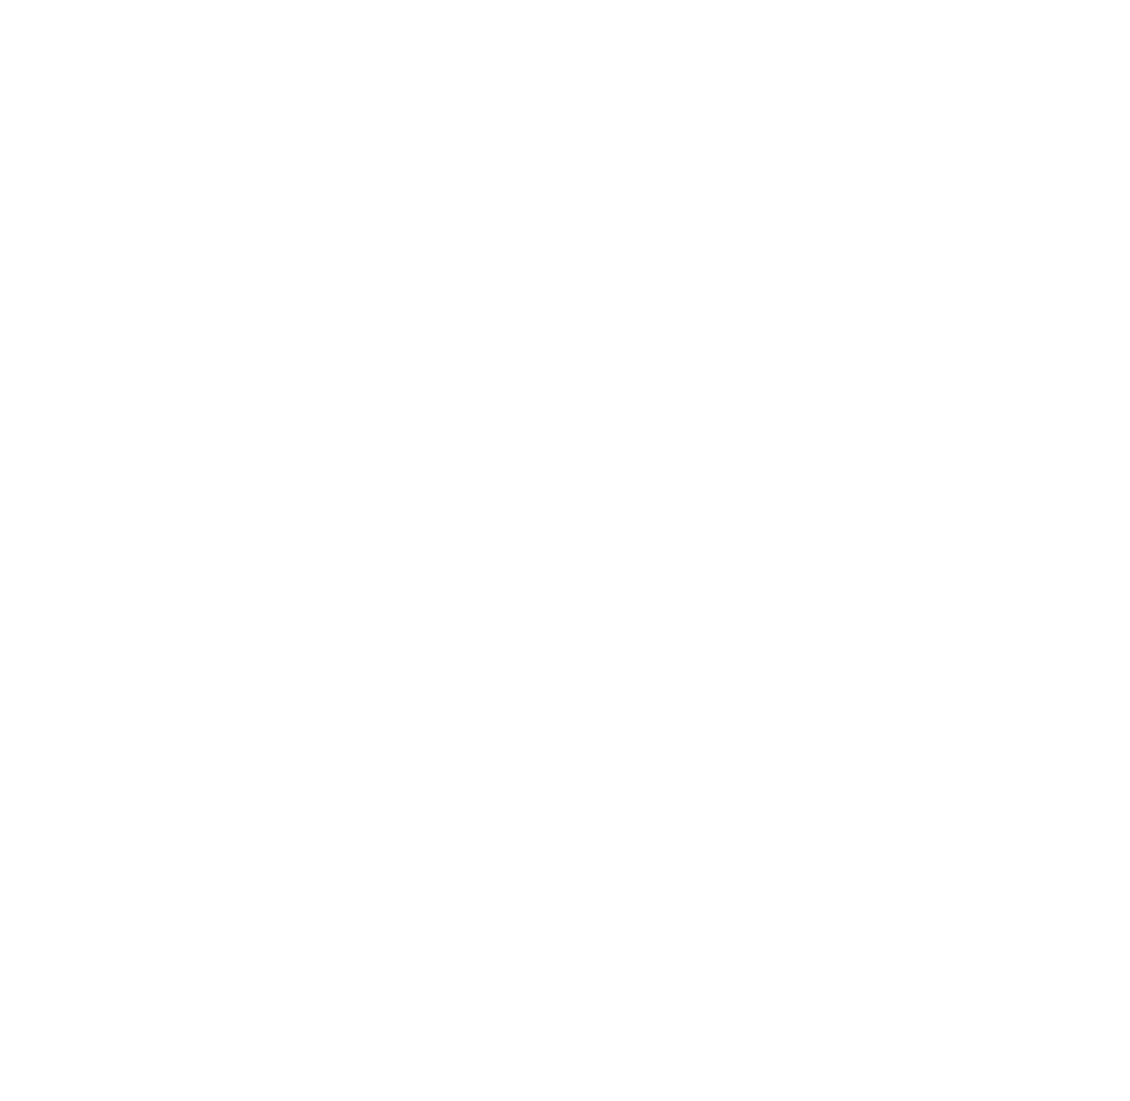

In [42]:
#2020

text = " ".join(i for i in reviewsDF2020.text)
wordcloud = WordCloud(stopwords = stopwords, width=800, height=400).generate(text)
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2020)
plt.show()

In [ ]:
#2021

text = " ".join(i for i in reviewsDF2021.text)
wordcloud = WordCloud(stopwords = stopwords, width=800, height=400).generate(text)
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2021)
plt.show()

In [ ]:
#2022

text = " ".join(i for i in reviewsDF2022.text)
wordcloud = WordCloud(stopwords = stopwords, width=800, height=400).generate(text)
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2022)
plt.show()

In [ ]:
#Let's create a df with the top topics for all the years
l1,l5,l6=len(top_2020),len(top_2021),len(top_2022)
max_len = max(l1,l5,l6,l7,l8)

if not max_len == l1:
  top_2020.extend(['-']*(max_len-l1))
if not max_len == l5:
  top_2021.extend(['-']*(max_len-l5))
if not max_len == l6:
  top_2022.extend(['-']*(max_len-l6))

topicsDF = pd.DataFrame({'2020':top_2020,'2021':top_2021,'2022':top_2022})
topicsDF

Even though we have the top topics for each year, it is difficult to infer how the trend has changed over the years!  

In [ ]:
reviewsDF

As the number of reviews in 2011 is very less, lets plot the polarity for the remaining years in terms of time

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
#reviewsDF2011.plot.line(x='date',y='polarity',ax=axes[0,0])
reviewsDF2020.plot.line(x='date',y='polarity',ax=axes[0,0],title='2020')
reviewsDF2021.plot.line(x='date',y='polarity',ax=axes[0,1],title='2021')
reviewsDF2022.plot.line(x='date',y='polarity',ax=axes[1,0],title='2022')

In [ ]:
#Let's create a DF with the total number of positive and negative reviews detected for each year
sentimentDF = pd.DataFrame(0,range(5),columns=['Year','pos','neg'])
sentimentDF

In [ ]:
sentimentDF.loc[0] = [2020,reviewsDF2020.Sentiment.value_counts()['pos'],reviewsDF2020.Sentiment.value_counts()['neg']]
sentimentDF.loc[1] = [2021,reviewsDF2021.Sentiment.value_counts()['pos'],reviewsDF2021.Sentiment.value_counts()['neg']]
sentimentDF.loc[2] = [2022,reviewsDF2022.Sentiment.value_counts()['pos'],reviewsDF2022.Sentiment.value_counts()['neg']]

In [ ]:
sentimentDF

In [ ]:
#Plot of positive vs negative reviews over the years
sentimentDF.plot.line(x='Year')

# **LDA & Topic trend**

Now, even though the LSA provided the topics, let's analyze the topics using LDA in order to analyze the trend and to better visualize the topics 

In [ ]:
df = reviewsDF
df

In [ ]:
warnings.filterwarnings('ignore')

reviews = list(df['text'])
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
reviews = pd.Series(reviews).apply(lambda x: x.split())
r1 = []
for wrd in reviews:
  doc = nlp(" ".join(wrd))
  r1.append([token.lemma_ for token in doc if token.pos_ in ['NOUN','ADJ']])

reviewsR1 = r1

In [ ]:
#LDA
dictionary = corpora.Dictionary(reviewsR1)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviewsR1]

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=20, random_state=42,chunksize=1000, passes=50)

In [ ]:
#The top 20 topics that the LDA model has learned are
lda_model.print_topics()

In [ ]:
#Just to check the correctness
lda_model.get_document_topics(doc_term_matrix[1])

Using the **pyLDAvis** let's visualize the topics and relations

In [ ]:
#Visualizing using the pyLDAvis inbuilt viz
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

In [ ]:
#Let's add a new column in the main df to get the topic number for each review
doc_lda = lda_model[doc_term_matrix]
max_topics = [max(sent, key=lambda x: x[1])[0] for sent in doc_lda]

In [ ]:
dftopic = df
dftopic['topic'] = max_topics

In [ ]:
dftopic

In [ ]:
#the topics for the whole df
dftopic.topic.value_counts()

In [ ]:
#Topic numbers for the year 2020
topic2020 = dftopic[dftopic.date.dt.year==2020]['topic'].value_counts().index.tolist()

In [ ]:
#Topic numbers for the year 2021
topic2021 = dftopic[dftopic.date.dt.year==2021]['topic'].value_counts().index.tolist()

In [ ]:
#Topic numbers for the year 2022
topic2022 = dftopic[dftopic.date.dt.year==2022]['topic'].value_counts().index.tolist()

The topics learned for each Year

In [ ]:
print("2020 - ",topic2020,"\n2021 - ",topic2021,"\n2022 - ",topic2022)

The list of all the topics learned with the LDA model

In [ ]:
for i in range(len(lda_model.print_topics())):
  print("Topic:%i" %i ," - ", lda_model.print_topics()[i][1], '\n')

We can see from above that:

In 2011: There are only 2 topics - Topic #15 and Topic#0

In [ ]:
lda_model.print_topics()[0][1]

In [ ]:
list(set(topic2020).intersection(topic2021))

From 2011 to 2015 there are two common topics

In [ ]:
list(set(topic2020).intersection(topic2022))

We can see that from 2015 to 2016 Topic #0 and #15 have been continued, and many more topics have been added

In [ ]:
list(set(topic2021).intersection(topic2022))

In [ ]:
for i in range(20):
  print("Topic:%i" %i )
  print(df[df.topic == i]['rating'].value_counts().index[0])

we can see that almost all the topics have the highest number of negative reviews except Topic #6 and #3

From the above learned topics, let's consider one of the most common topic #10 that has been talked about since 2015, which indicates it's one of the most important things people are talking about 

In [ ]:
#Let's see some reviews with the topic #10
list(df[df.topic == 10]['text'][:20])

In [ ]:
df[df.topic == 10]['rating'].value_counts()

We can see from above that most of the reviews are negative, and almost more thatn 75% of the reviews have a 1-star rating. So, we can confirm that this is one of the most important topic people have been talking about over the years.

Similarly we can analyze the rest of the topics depending on the requirement, and how the service wants to be improved, for example if they want to improve the Application, they can see the topic most related to "app" and then do the same analysis as above. 